#### 셀레니움
- 웹을 테스트 하기 위한 프레임워크
- 브라우저를 통해서 자동으로 일을 시켜볼 수 있음
- pip install selenium
- 사용하려는 브라우저를 조작하기 때문에 웹드라이버가 필요함
    - chrome : version 확인 ==> 버젼에 맞는 웹드라이버 다운로드
- 파싱 라이브러리를 사용하지 않아도 됨(셀레니움에서 제공하는 파싱 방법 사용)

In [2]:
from selenium import webdriver
import time

driver = webdriver.Chrome()

driver.get("https://www.naver.com")

time.sleep(2)
driver.quit()

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

def set_chrome_driver():
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument("--start-maximized")
    driver = webdriver.Chrome(
        service=Service(ChromeDriverManager().install()), options=chrome_options
    )
    return driver

Daum
https://www.daum.net/

<html lang="ko"><head>
  <meta charset="utf-8">
  <title>Daum</title>
  <meta http-equiv="x-ua-compatible" content="IE=edge">
  <meta property="og:url" content="https://www.daum.net/">
  <meta property="og:type" content="website">
  <meta property="og:title" content="Daum">
  <meta http-equiv="Pragma" content="no-cache">
  <meta http-equiv="Expires" content="-1">
  <meta name="referrer" content="origin">
  <meta property="og:image" content="https://i1.daumcdn.net/svc/image/U03/common_icon/5587C4E4012FCD0001">
  <meta property="og:description" content="이용자 선택권을 강화한 뉴스, 세상의 모든 정보를 연결하는 검색. Daum에서 나의 관심 콘텐츠를 즐겨보세요.">
  <meta name="description" content="이용자 선택권을 강화한 뉴스, 세상의 모든 정보를 연결하는 검색. Daum에서 나의 관심 콘텐츠를 즐겨보세요.">
  <meta name="msapplication-task" content="name=Daum;action-uri=//www.daum.net/;icon-uri=/favicon.ico">
  <meta name="msapplication-task" content="name=미디어다음;action-uri=//news.daum.net/;icon-uri=/media_favicon.ico">
  <meta name="msapplication-task" 
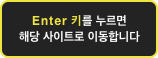

In [5]:
import time

driver = set_chrome_driver()
driver.get("https://www.daum.net")

print(driver.title)
print(driver.current_url)

print()
print(driver.page_source)   # 현재 페이지 소스 가져오기

time.sleep(2)
driver.quit()

In [8]:
from selenium.webdriver.common.by import By #파싱
from selenium.webdriver.common.keys import Keys # 키보드 키 지정

driver = set_chrome_driver()
driver.get("https://www.daum.net")

# 다음 검색어 창에 검색어를 입력한 후 엔터

#검색창 찾기(파싱) : find_
# driver.find_element(기준,"값")
# By.ID,
element = driver.find_element(By.NAME,"q")
# element

# 검색어 입력
element.send_keys("아이폰")
# 엔터
element.send_keys(Keys.ENTER)

# 뒤로가기
driver.back()

In [9]:
# 네이버 - 검색 창에 임의의 검색어 넣은 후 엔터

driver = set_chrome_driver()
driver.get("https://naver.com")

element = driver.find_element(By.ID,"query")

element.send_keys("장마")

element.send_keys(Keys.ENTER)

In [13]:
# 다나와

driver = set_chrome_driver()
driver.get("https://www.danawa.com/")
# 페이지가 로딩될 때까지 잠시 기다리기 : time.sleep(2), driver.implicitly_wait(2)
driver.implicitly_wait(2)

# 로그인 버튼 찾기 => 클릭
# <a href="https://auth.danawa.com/login?url=https%3A%2F%2Fwww.danawa.com%2F%3Fsrc%3Dadwords%26kw%3DGA0000020%26utm_source%3Dgoogle%26utm_medium%3Dcpc%26utm_campaign%3Dkeyword%26gad%3D1%26gclid%3DCjwKCAjw2K6lBhBXEiwA5RjtCSL7O_Ue12riajXssJFHL4njEsrw2bLgvLwUJmjK7nPot5YcMV0vyRoCxvoQAvD_BwE" role="button" class="btn_user btn_user--login">
# 		<span class="txt">로그인</span>	</a>
login_btn = driver.find_element(By.CLASS_NAME,"btn_user--login")
login_btn.send_keys(Keys.ENTER)
driver.implicitly_wait(2)

# 다나와 아이디 / 비밀번호
userid = driver.find_element(By.ID,"danawa-member-login-input-id")
userid.send_keys("wotla3009")

password = driver.find_element(By.ID,"danawa-member-login-input-pwd")
password.send_keys("wo3244852!")
password.send_keys(Keys.ENTER)


In [19]:
# 한국은행 경제통계 시스템

driver = set_chrome_driver()
driver.get("https://ecos.bok.or.kr/#/")

driver.implicitly_wait(2)
# 100 대 통계지표 요소 찾기
# div.main-left > div.main-icon-menu > ul > li:nth-child(1) > a
driver.find_element(By.CSS_SELECTOR,"div.main-left > div.main-icon-menu > ul > li:nth-child(1) > a").click()
driver.implicitly_wait(2)

# Excel로 다운로드
#root > div.wrap-body > div > div.statics_header > div > div.searchBox > div.exelDown.partition-right
excel_btn = driver.find_element(By.CSS_SELECTOR,"div.searchBox > div.exelDown.partition-right").click()

In [30]:
import time

driver = set_chrome_driver()
driver.get("https://www.youtube.com/")

# driver.implicitly_wait(2)
time.sleep(2)

# 검색 창 찾기
search = driver.find_element(By.NAME,"search_query")
#검색어 입력
search.send_keys("아이유")
search.send_keys(Keys.ENTER)

# driver.implicitly_wait(5)
time.sleep(3)

# title 출력
titles = driver.find_elements(By.CSS_SELECTOR,"#title-wrapper > h3")
for title in titles:
    print(title.text)

[FILM] IU Media Art Exhibition "Moment,"
[IU TV] Happy IU day💛 갓벽한 하루 Vlog🎂
아이유 노래 모음 BEST 50곡, (IU song collection 50 Playlist ) 보고듣는 소울뮤직TV
IU Best Songs Playlist (2023 updated) audio
[PLAYLIST] 아이유노래모음
K POP 아이유 노래모음 30곡 가사포함 ｜ IU Playlist 30 Songs Korean Lyrics
💿𝗙𝗨𝗟𝗟▸ 아이유 노래모음 | IU songs playlist
- [Playlist] IU (아이유) Best Songs 2023 - 아이유 최고의 노래모음 - IU 최고의 노래 컬렉션 - LILAC
[MV] IU(아이유) _ Blueming(블루밍)
[Playlist] 내가 좋아하는 잔잔한 아이유 노래 모음
IU (아이유) song playlist. (Happy, funny, and fight song to cafe, study, and fun moments)
💿𝗙𝗨𝗟𝗟▸ 아이유 노래모음 | IU songs playlist
{ * 힘내자~ } 아이유 노동요 69곡 모음 Exciting iU's songs playlist, 월요병 퇴치~ Feat.3일동안
[ PLAYLIST ] 아이유 노래모음
[IU] '내 손을 잡아(Hold My Hand)' Live Clip (2019 IU Tour Concert 'Love, poem')
아이유(IU)의 킬링보이스를 라이브로! - 하루 끝, 너의 의미, 스물셋, 밤편지, 팔레트, 가을 아침, 삐삐, Blueming, 에잇, Coin, 라일락 ㅣ 딩고뮤직
[MV] IU(아이유) _ Celebrity
『Playlist』 2021 아이유 IU 노래모음ㅣBest Songs of IU ㅣ🎯『광고제거가능』
[𝐏𝐥𝐚𝐲𝐥𝐢𝐬𝐭] 아이유 X 볼빨간사춘기 X 태연🌸💕
"나랑 하고 싶어요?" 초면에 돌직구 던진 유인나
머리도 하고 화장도 하고 일도 하고
IQ 200 "고양이

In [31]:
from bs4 import BeautifulSoup

driver = set_chrome_driver()
driver.get("https://www.youtube.com/")

time.sleep(2)

# 검색 창 찾기
search = driver.find_element(By.NAME,"search_query")
#검색어 입력
search.send_keys("아이유")
search.send_keys(Keys.ENTER)

time.sleep(3)

res = BeautifulSoup(driver.page_source)
titles = res.select("#title-wrapper > h3")
for title in titles:
    print(title.text)   #string, get_text(), text






아이유 노래 모음 BEST 50곡, (IU song collection 50 Playlist ) 보고듣는 소울뮤직TV







[FILM] IU Media Art Exhibition "Moment,"







[IU TV] Happy IU day💛 갓벽한 하루 Vlog🎂







[PLAYLIST] 아이유노래모음







IU Best Songs Playlist  (2023 updated) audio







- [Playlist] IU (아이유) Best Songs 2023 - 아이유 최고의 노래모음 - IU 최고의 노래 컬렉션 - LILAC







💿𝗙𝗨𝗟𝗟▸ 아이유 노래모음 | IU songs playlist







아이유(IU)의 킬링보이스를 라이브로! - 하루 끝, 너의 의미, 스물셋, 밤편지, 팔레트, 가을 아침, 삐삐, Blueming, 에잇, Coin, 라일락 ㅣ 딩고뮤직







[IU] '내 손을 잡아(Hold My Hand)' Live Clip (2019 IU Tour Concert 'Love, poem')







[MV] IU(아이유) _ Blueming(블루밍)







[ PLAYLIST ] 아이유 노래모음







서울 호우경보, 구로구 첫 '극한호우' 재난문자..수도권 대부분 지역 호우 특보 / 이 시각 주요지점 침수 호우 상황 - [끝까지LIVE] MBC뉴스 2023년 7월 11일







잠 잘때 듣기 좋은 아이유 노래 (7곡) | 타임라인 설명&고정댓글 | 다들 좋은 꿈꿔요







여행갈때, 운전할때 아니면 잘때도 듣기 좋은 아이유 노래 10시간!!! (canciones de IU - songs of IU)







[Playlist] 내가 좋아하는 잔잔한 아이유 노래 모음







[MV] IU(아이유) _ Celebrity







『Playlist』 2021 아이유 IU 노래모음ㅣBest Songs of IU ㅣ🎯『광고제거가능』







K PO

In [32]:
driver = set_chrome_driver()
driver.get("https://www.daum.net")

element = driver.find_element(By.NAME,"q")

# 검색어 입력
element.send_keys("아이폰")
# 엔터
element.send_keys(Keys.ENTER)

driver.save_screenshot("./iphone.png")
driver.get_screenshot_as_file("./iphone2.png")

True

In [37]:
# iframe
# switch_to.frame() : iframe 안에 있는 요소 찾기 위해서는 iframe 안으로 이동

url = "https://www.w3schools.com/tags/tryit.asp?filename=tryhtml_headers"
driver = set_chrome_driver()
driver.get(url)

driver.switch_to.frame("iframeResult")

element = driver.find_element(By.TAG_NAME,"h1")
print(element.text)

# iframe 밖으로 나오기
driver.switch_to.default_content()

# //*[@id="textareawrapper"]/div/div[6]/div[1]/div/div/div/div[5]/pre[5]/span/span[4]
element2 = driver.find_element(By.XPATH,"//*[@id='textareawrapper']/div/div[6]/div[1]/div/div/div/div[5]/pre[5]/span/span[4]")
print(element2.text)

This is heading 1
This is heading 1


In [40]:
#textareawrapper > div > div.CodeMirror-scroll > div.CodeMirror-sizer > div > div > div > div.CodeMirror-code > pre:nth-child(5) > span > span:nth-child(4)
url = "https://www.w3schools.com/tags/tryit.asp?filename=tryhtml5_input_type_radio"

driver = set_chrome_driver()
driver.get(url)

# 왼쪽 화면에서 h1 태그 안 내용 출력
element1 = driver.find_element(By.XPATH,"//*[@id='textareawrapper']/div/div[6]/div[1]/div/div/div/div[5]/pre[5]/span/span[4]")
print(element1.text)

# 오른쪽 화면에서 HTML 라디오 버튼 클릭
driver.switch_to.frame("iframeResult")

driver.find_element(By.ID,"html").click()

# iframe 밖으로 나오기
driver.switch_to.default_content()

Display Radio Buttons


In [43]:
# 새탭 열기와 같은 작업은 스크립트 실행 : execute_script(스크립트 코드 작성)

driver = set_chrome_driver()
driver.get("https://www.naver.com")

driver.execute_script("window.open('https://www.daum.net')")